In [12]:
x = rnorm(34, mean = 105.5, sd = 20.1)
x
y = rnorm(29, mean = 90.9, sd = 12.2)
y

[1] 100.99404 102.98254  80.03248  68.20961  95.02572  82.31222  72.00456
 [8] 107.68039  96.28750 112.13586 151.03685 105.54637  80.97970  99.04839
[15]  94.73410  96.30569 115.56196 106.16692  95.52014  94.79740 133.27068
[22] 132.87274  86.66607 122.67763 111.46249 118.98527  98.90351  89.32975
[29] 126.04207  96.88847 100.41670  91.50172 109.53015  97.07392

[1]  85.19478 105.97680  61.09888 100.95282  85.03423 101.36804  92.61811
 [8] 103.34714  97.95224  91.23270  84.26145  83.95840  77.19970  74.55695
[15]  93.50537  74.56276 109.77255  83.36002  84.39665  78.85166 105.67568
[22]  74.16237  79.78560  71.81805 105.81768  89.52405  92.63506  72.40073
[29]  88.25966

In [2]:
var.test(x, y)


	F test to compare two variances

data:  x and y
F = 2.63, num df = 33, denom df = 28, p-value = 0.0108
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.258953 5.375903
sample estimates:
ratio of variances 
          2.629996 


In [14]:
F = var(x)/var(y)
F
L = qf(0.025,33,28)
L
U = qf(0.975,33,28)
U

[1] 2.024104

[1] 0.4892193

[1] 2.089035

In [17]:
# I change a little bit in the original text txt Y -> Grade, X-> ACT to 
data <- read.delim("CH01PR19_grade.txt", sep ="", header = TRUE)
head(data)

Grade,ACT
3.897,21
3.885,14
3.778,28
2.540,22
3.028,21
3.865,31


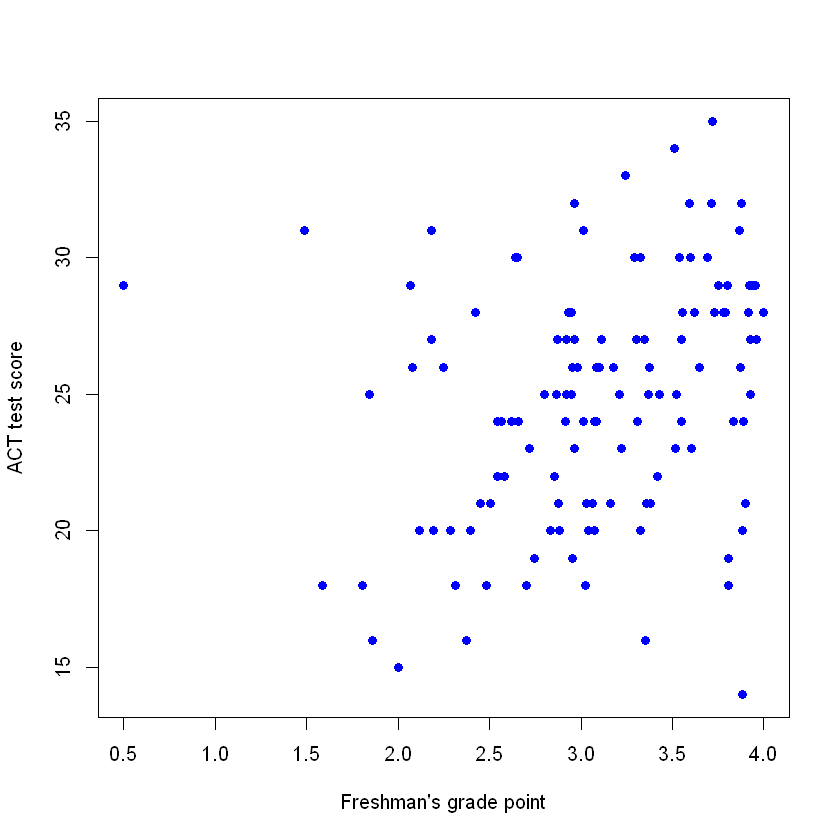

In [18]:
attach(data)

plot(Grade, ACT, pch=16, col='blue', xlab = "Freshman's grade point", ylab = 'ACT test score')

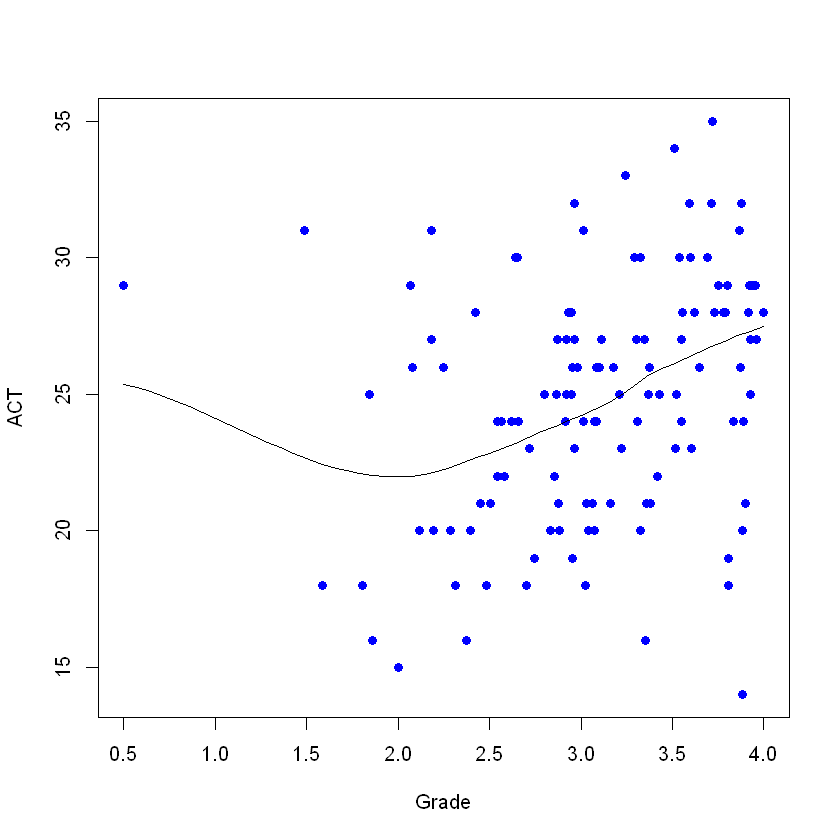

In [19]:
# Scatter plot with smooth option
scatter.smooth(Grade, ACT, col='blue', pch = 16)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


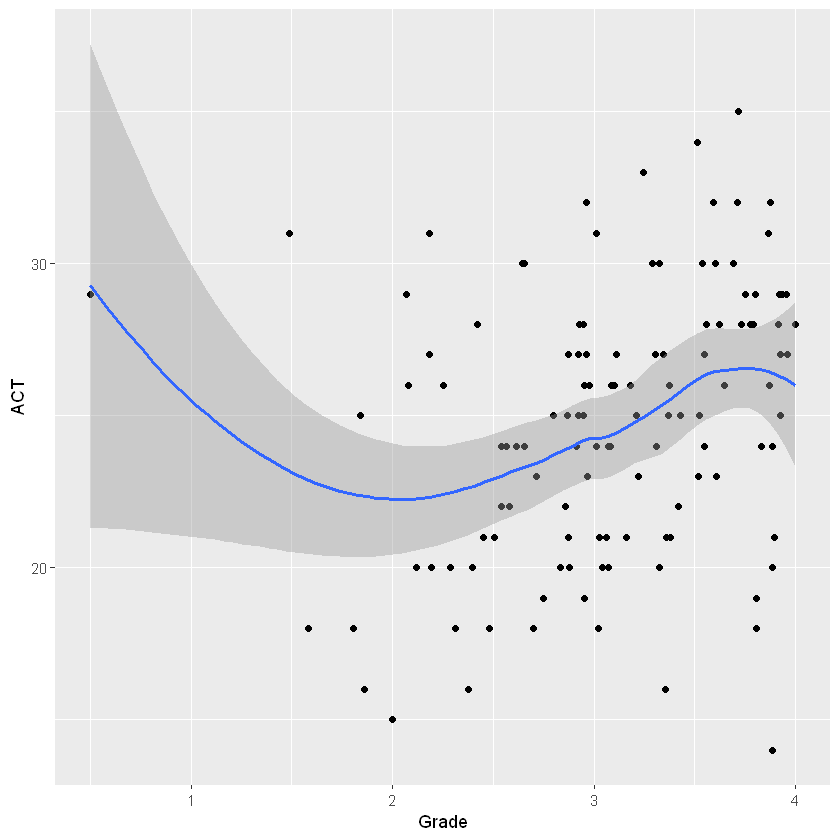

In [20]:
# install.packages("ggplot2", repos = "http://cran.us.r-project.org")
# Using ggplot
library(ggplot2)
ggplot(data, aes(x = Grade, y = ACT)) +
  geom_point() +
  stat_smooth()

### Using lm function

In [25]:
model = lm(ACT ~ Grade)
summary(model)


Call:
lm(formula = ACT ~ Grade)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.242  -3.276   0.218   2.657   9.245 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  18.9754     1.9322   9.821  < 2e-16 ***
Grade         1.8704     0.6153   3.040  0.00292 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.325 on 118 degrees of freedom
Multiple R-squared:  0.07262,	Adjusted R-squared:  0.06476 
F-statistic:  9.24 on 1 and 118 DF,  p-value: 0.002917


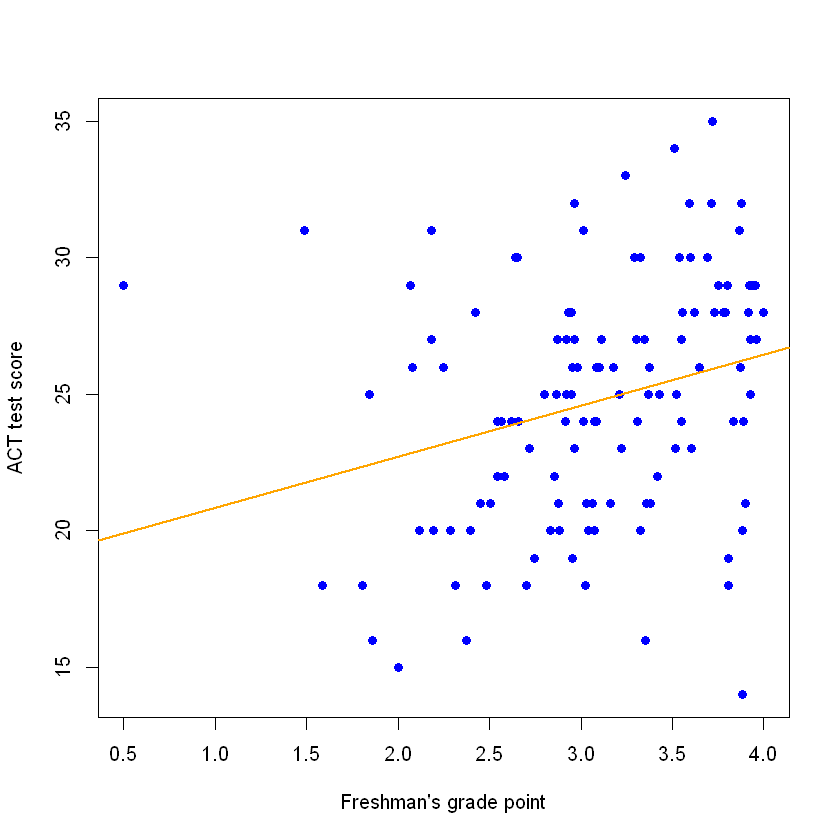

In [26]:
# with fitted line
plot(Grade, ACT, pch=16, col='blue', xlab = "Freshman's grade point", ylab = 'ACT test score')
abline(model$coef, lwd=2, col='orange')

## Manual calculation

In [27]:
X = Grade
Y = ACT
val1 = sum((X - mean(X))*(Y-mean(Y)))
val1

[1] 92.40565

In [28]:
sumvar =  sum((X - mean(X))^2)
sumvar

[1] 49.40545

In [29]:
b1 = val1/sumvar
b1
b0 = mean(Y) - b1*mean(X)
b0

[1] 1.870353

[1] 18.97544

In [30]:
coef(model)

(Intercept)       Grade 
  18.975441    1.870353